In [2]:
import cv2
import numpy as np

In [3]:
image=cv2.imread('triangle.jpg')
scale_percent = 20 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [124]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)
edged=cv2.Canny(gray,100,200)
cv2.imshow('Canny', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
#use a copy of your image, e.g. - edged.copy(), since finding contours alter the image
#we have to add _, before the contours as an empty argument due to upgrade of the OpenCV version
_,contours,hierarchy=cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

print('Numbers of contours found=' + str(len(contours)))
cross = 0
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx) >2 and len(approx) <20:
        cross += 1
        shape_name="Cross"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        M=cv2.moments(cnt)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1)
cv2.imshow('identifying shapes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(cross)

Numbers of contours found=1
1


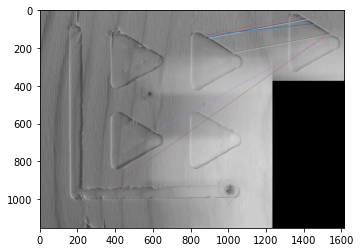

(<matplotlib.image.AxesImage at 0x20e22d9ac88>, None)

In [129]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('triangle.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('token.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:1000],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [4]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    _, contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Find the convex hull object for each contour
    hull_list = []
    for i in range(len(contours)):
        hull = cv.convexHull(contours[i])
        hull_list.append(hull)
    # Draw contours + hull results
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color)
        cv.drawContours(drawing, hull_list, i, color)
    # Show in a window
    cv.imshow('Contours', drawing)
# Load source image
src = image
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# Create Window
source_window = 'Source'
cv.namedWindow(source_window)
cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv.waitKey()

-1